In [2]:
import pandas as pd
import sys
# Req for package
sys.path.append("../")
from SkinLearning.NN.Helpers import train, test, DEVICE, get_parameter_loss, set_seed, kfcv
from SkinLearning.NN.Models import MultiTemporal
from SkinLearning.Utils.Dataset import get_dataset, get_split
from SkinLearning.Utils.Plotting import plot_parameter_bars, print_curves
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [2]:
df = pd.read_csv("../Results/KFCV/CNN_Temp.csv")

In [4]:
display(df)

,Unnamed: 0,Architecture,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE,runs
0,0,"RNN, Single FC, Final Output",4.789774,16.102581,0.226659,0.249721,21.842530,8.157157,8.561403,0.050310,0
1,1,"GRU, Single FC, Final Hidden",2.970484,13.709017,0.145719,0.174728,10.855662,4.311267,5.361147,0.034965,0
2,2,"LSTM, Multi FC, Final Output",3.595735,10.772459,0.174093,0.140132,10.360636,5.192973,5.039338,0.034926,0
3,0,"RNN, Single FC, Final Output",3.718994,10.958085,0.185680,0.162704,16.108633,6.534859,6.278159,0.037007,1
4,1,"GRU, Single FC, Final Hidden",2.475453,9.263675,0.125027,0.123971,9.042543,3.598881,4.104925,0.026599,1
5,2,"LSTM, Multi FC, Final Output",2.521491,9.270358,0.136649,0.124275,9.348806,4.510238,4.318636,0.028109,1
6,0,"RNN, Single FC, Final Output",3.124371,11.176588,0.160569,0.152586,14.135104,6.466357,5.869262,0.034176,2
7,1,"GRU, Single FC, Final Hidden",2.370281,9.354948,0.114332,0.102689,9.330448,3.145800,4.069749,0.023920,2
8,2,"LSTM, Multi FC, Final Output",2.425916,9.518193,0.116949,0.125682,8.942152,4.471201,4.266682,0.028047,2
9,0,"RNN, Single FC, Final Output",2.836125,9.497561,0.139560,0.139781,16.121042,5.551889,5.714326,0.030103,3


In [16]:
means

,Unnamed: 0,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE,runs
Architecture,,,,,,,,,,
"GRU, Single FC, Final Hidden",1.0,1.986946,8.571995,0.096999,0.100593,7.709288,3.229962,3.615964,0.021993,4.5
"LSTM, Multi FC, Final Output",2.0,1.895228,7.629513,0.093886,0.094792,7.403741,3.730776,3.474656,0.021603,4.5
"RNN, Single FC, Final Output",0.0,2.718686,9.407326,0.135766,0.128596,13.129205,5.182162,5.116957,0.028615,4.5


(0.0, 14.0)

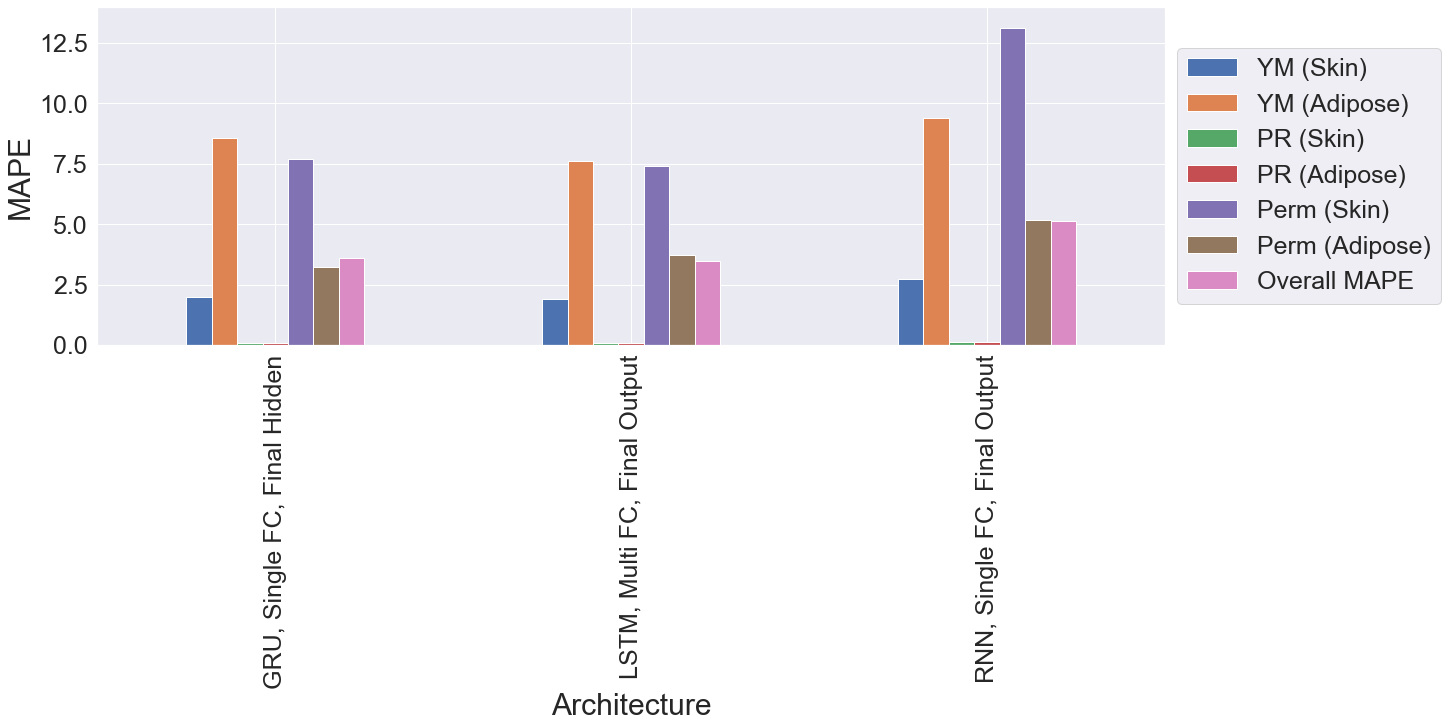

In [21]:
import seaborn as sns
sns.set_theme()
means = df.groupby("Architecture").mean().drop(columns=['Unnamed: 0', 'runs', 'Overall MAE'])
fig, ax = plt.subplots(1, 1, figsize=(20, 10), constrained_layout=True)
means.plot.bar(ax=ax)
ax.xaxis.set_tick_params(labelsize=25)
ax.yaxis.set_tick_params(labelsize=25)
ax.set_ylabel("MAPE", fontsize=30)
ax.set_xlabel("Architecture", fontsize=30)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),  prop={'size': 25})
ax.set_ylim(0, 14)


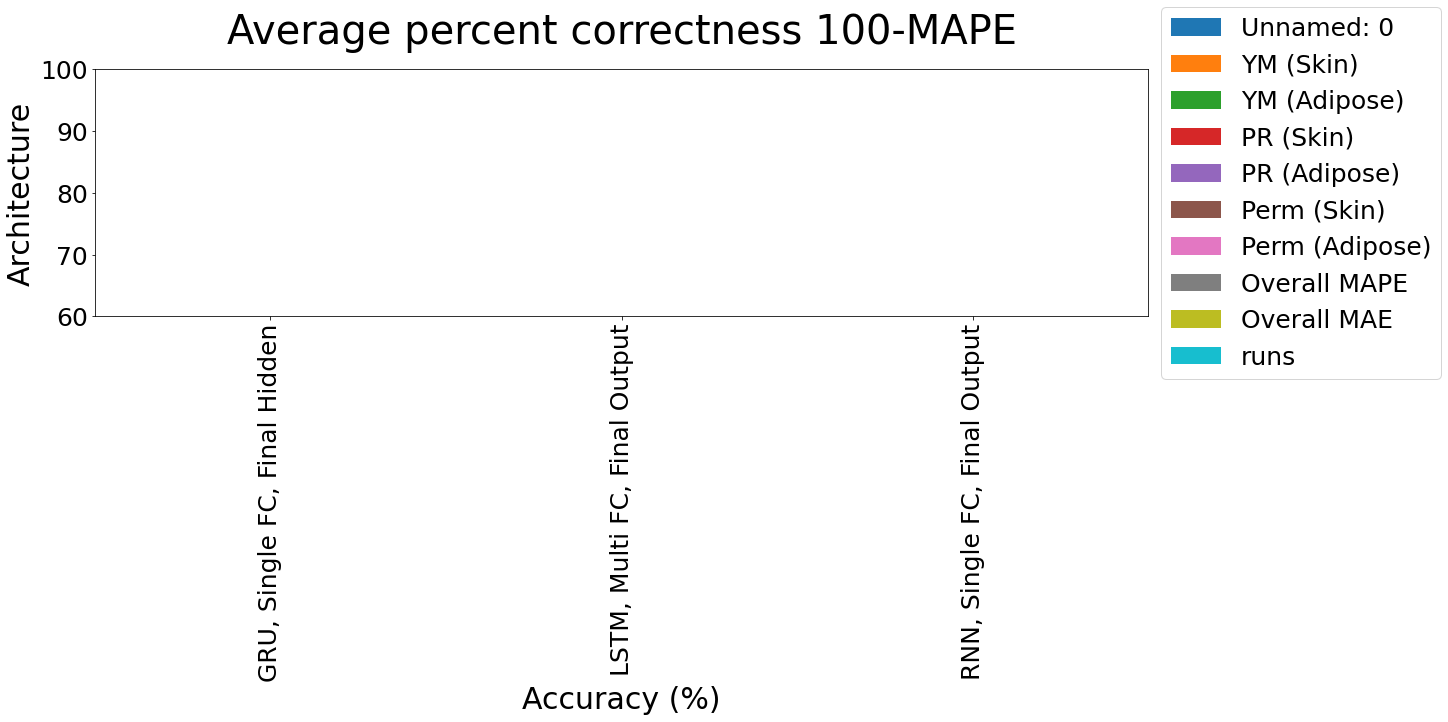

In [12]:
plot_parameter_bars(means)

In [4]:
2.5e4 == 25e3

True

# Kfold on all temporal net combinations

## CNNs

In [311]:
gru = pd.read_csv("../Results/KFCV/CNN/GRU.csv")
lstm = pd.read_csv("../Results/KFCV/CNN/LSTM.csv")
rnn = pd.read_csv("../Results/KFCV/CNN/RNN.csv")

In [312]:
cnns = pd.concat([gru, lstm, rnn])

In [313]:
cnns = cnns.rename(columns={'Unnamed: 0': 'Architecture'})

In [8]:
def get_architecture_name(x, wpd=False):
    x = x.split("'")[1:]
    x.remove(", ")
    print(x)
    
    x[-1].replace(", ", "")
    x[-1] = x[-1].replace(")", "")
    
    x[-1] = x[-1].replace(", ", "")
    x[-1] = eval(x[-1])
    
    if wpd:
        x[3] = x[3][:6] if x[0] == 'Concatenate' else x[3][:5]
    
    return f"{x[3].capitalize() if wpd else ''} {x[1]}, FC x{'1' if x[-1] else '3'}, {x[0]}"

In [315]:
cnns['Architecture'] =  cnns['Architecture'].apply(lambda x: get_architecture_name(x))

['output', 'GRU', ', False)']
 GRU, FC x3, output
['f_hidden', 'GRU', ', True)']
 GRU, FC x1, f_hidden
['f_output', 'GRU', ', True)']
 GRU, FC x1, f_output
['f_hidden', 'LSTM', ', True)']
 LSTM, FC x1, f_hidden
['output', 'LSTM', ', True)']
 LSTM, FC x1, output
['f_hidden', 'LSTM', ', False)']
 LSTM, FC x3, f_hidden
['f_output', 'RNN', ', False)']
 RNN, FC x3, f_output
['h+o', 'RNN', ', False)']
 RNN, FC x3, h+o
['output', 'RNN', ', False)']
 RNN, FC x3, output


In [316]:
cnns = cnns.set_index(['Architecture'])

In [317]:
cnns

,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE
Architecture,,,,,,,,
"GRU, FC x3, output",2.222450,9.614604,0.104374,0.134077,10.420935,3.877564,4.395667,0.026035
"GRU, FC x1, f_hidden",2.517912,9.411774,0.125433,0.120470,9.777822,3.325574,4.213164,0.026262
"GRU, FC x1, f_output",3.181138,8.337201,0.142449,0.106400,10.013922,3.823132,4.267374,0.027516
"LSTM, FC x1, f_hidden",2.084959,8.505416,0.107710,0.104581,7.950046,3.006329,3.626507,0.022962
"LSTM, FC x1, output",2.464321,8.572371,0.103587,0.094896,9.270177,2.978430,3.913964,0.023221
"LSTM, FC x3, f_hidden",2.299173,8.545232,0.115158,0.103606,9.726789,3.405267,4.032538,0.023950
"RNN, FC x3, f_output",2.258512,8.114416,0.112529,0.105910,8.524662,3.628058,3.790681,0.023627
"RNN, FC x3, h+o",2.439509,10.451700,0.123345,0.117858,9.692329,4.232755,4.509583,0.028016
"RNN, FC x3, output",3.017380,9.574201,0.130133,0.144608,13.111383,5.915588,5.315549,0.030473


### Get top CNN networks

In [318]:
cnns = cnns.nsmallest(3, 'Overall MAE')

In [319]:
max(cnns.max())

9.270176887512209

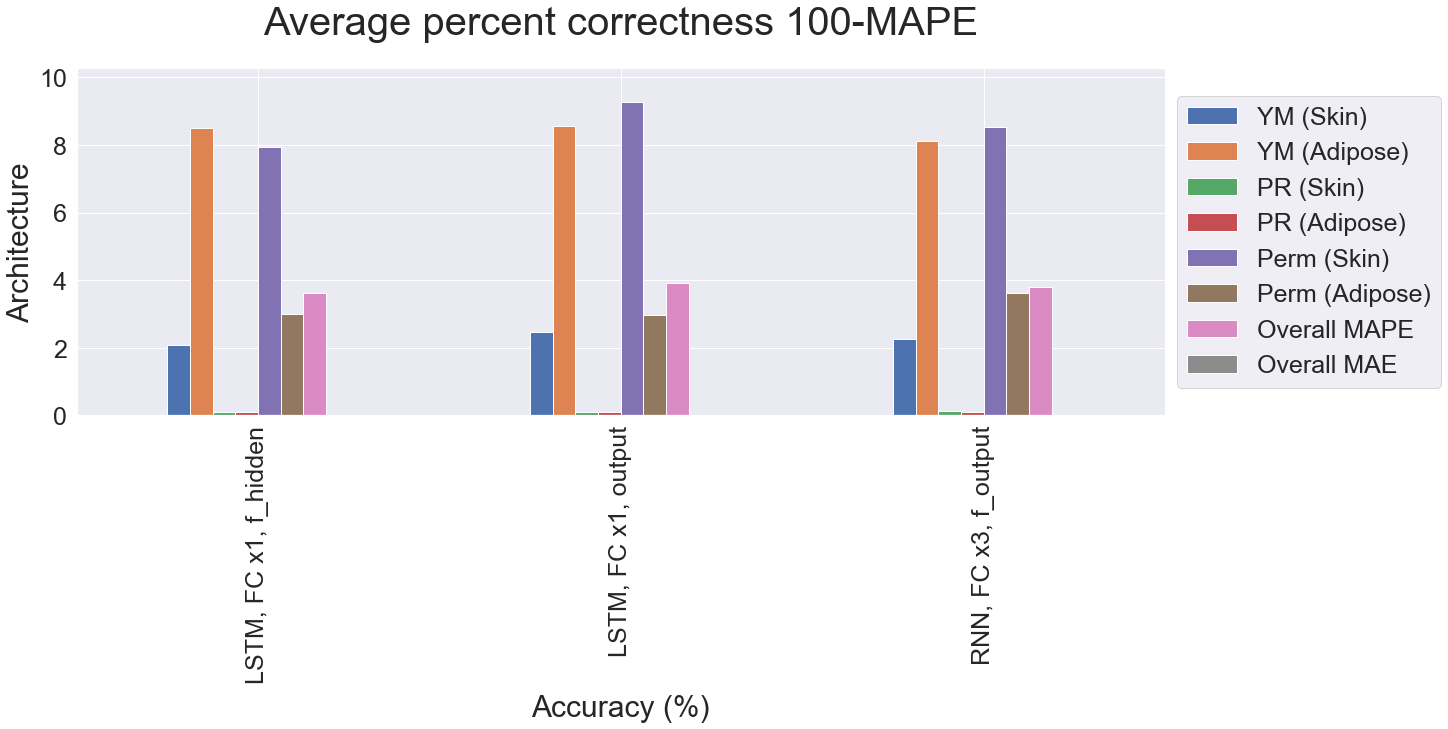

In [320]:
plot_parameter_bars(cnns, max_y=max(cnns.max())+1)

In [322]:
cnns.to_csv("../Results/KFCV/CNN/top_3_temporal.csv")

In [12]:
pd.read_csv("../Results/KFCV/WPD/top_3_temporal(largerHidden).csv")

,Architecture,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE
0,"Conca RNN, FC x3, h+o",4.855326,13.851527,0.239294,0.193429,13.604988,4.010625,6.125865,0.043722
1,"Conca RNN, FC x3, f_output",4.716166,14.573893,0.230913,0.210003,10.645582,3.984613,5.726862,0.044162
2,"Conca GRU, FC x3, f_output",5.051675,13.260800,0.254175,0.189188,12.323178,3.818988,5.816334,0.044226


## WPD

Model 1: 5.225210666656494, MAE: 0.03297172291525479
Model 2: 5.071382999420166, MAE: 0.03324704925470017
Model 3: 5.009763240814209, MAE: 0.03325633323370603
Model 4: 5.5245866775512695, MAE: 0.03536424990192863
Elapsed time: 10 hours, 29 minutes, 43 seconds

In [3]:
gru_indep = pd.read_csv("../Results/KFCV/WPD/GRU_independent.csv")
gru_concat = pd.read_csv("../Results/KFCV/WPD/GRU_concatenate.csv")
lstm_indep = pd.read_csv("../Results/KFCV/WPD/LSTM_independent.csv")
lstm_concat = pd.read_csv("../Results/KFCV/WPD/LSTM_concatenate.csv")
rnn_indep = pd.read_csv("../Results/KFCV/WPD/RNN_independent.csv")
rnn_concat = pd.read_csv("../Results/KFCV/WPD/RNN_concatenate.csv")

In [ ]:
def get_group_stats(architecture_index)

In [15]:
wpds

,Unnamed: 0,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE
0,"('f_output', 'GRU', 'independent', True)",3.522048,10.664265,0.173645,0.124640,10.733866,3.552823,4.795214,0.031454
1,"('h+o', 'GRU', 'independent', True)",3.599894,11.196172,0.177847,0.138551,11.384942,3.599463,5.016145,0.033036
2,"('f_output', 'GRU', 'independent', False)",3.699143,10.979154,0.184101,0.130256,10.871145,3.571321,4.905853,0.033147
3,"('f_hidden', 'GRU', 'independent', False)",3.646779,11.855492,0.182800,0.143658,12.131579,3.331151,5.215243,0.034141
4,"('h+o', 'GRU', 'independent', False)",3.825199,11.452570,0.186164,0.139234,13.247940,3.842906,5.449003,0.034725
5,"('output', 'GRU', 'independent', True)",3.906118,12.036929,0.193078,0.148619,11.968383,3.792294,5.340903,0.035847
6,"('output', 'GRU', 'independent', False)",4.060275,11.825900,0.203691,0.142283,12.896799,3.800320,5.488212,0.035998
7,"('f_hidden', 'GRU', 'independent', True)",4.124944,12.930635,0.206300,0.158132,12.041056,3.855814,5.552814,0.038087
8,"('hidden', 'GRU', 'independent', False)",8.391495,72.983521,0.321774,0.967468,185.670776,128.868668,66.200623,0.184641
9,"('hidden', 'GRU', 'independent', True)",8.541632,72.720772,0.316459,0.969972,180.761078,134.636414,66.324387,0.184809


In [16]:
gru_indep = pd.read_csv("../Results/KFCV/WPD/GRU_independent_top3.csv")
gru_concat = pd.read_csv("../Results/KFCV/WPD/GRU_concatenate_top3.csv")
lstm_indep = pd.read_csv("../Results/KFCV/WPD/LSTM_independent_top3.csv")
lstm_concat = pd.read_csv("../Results/KFCV/WPD/LSTM_concatenate_top3.csv")
rnn_indep = pd.read_csv("../Results/KFCV/WPD/RNN_independent_top3.csv")
rnn_concat = pd.read_csv("../Results/KFCV/WPD/RNN_concatenate_top3.csv")

In [17]:
wpds = pd.concat([
    gru_indep,
    gru_concat,
    lstm_indep,
    lstm_concat,
    rnn_indep,
    rnn_concat
])

In [ ]:
wpd_best = pd.read_csv("../Results/WPD/")

In [18]:
wpds = wpds.rename(columns={'Unnamed: 0': 'Architecture'})

In [19]:
wpds['Architecture'] =  wpds['Architecture'].apply(lambda x: get_architecture_name(x, wpd=True))

['f_output', 'GRU', ', ', 'independent', ', True)']
['h+o', 'GRU', ', ', 'independent', ', True)']
['f_output', 'GRU', ', ', 'independent', ', False)']
['f_hidden', 'GRU', ', ', 'independent', ', False)']
['output', 'GRU', ', ', 'concatenate', ', False)']
['f_hidden', 'GRU', ', ', 'concatenate', ', False)']
['f_hidden', 'GRU', ', ', 'concatenate', ', True)']
['hidden', 'GRU', ', ', 'concatenate', ', False)']
['h+o', 'LSTM', ', ', 'independent', ', False)']
['h+o', 'LSTM', ', ', 'independent', ', True)']
['output', 'LSTM', ', ', 'independent', ', True)']
['hidden', 'LSTM', ', ', 'independent', ', False)']
['hidden', 'LSTM', ', ', 'concatenate', ', True)']
['f_hidden', 'LSTM', ', ', 'concatenate', ', True)']
['f_output', 'LSTM', ', ', 'concatenate', ', False)']
['h+o', 'LSTM', ', ', 'concatenate', ', False)']
['output', 'RNN', ', ', 'independent', ', False)']
['f_output', 'RNN', ', ', 'independent', ', True)']
['f_hidden', 'RNN', ', ', 'independent', ', True)']
['h+o', 'RNN', ', ', 'inde

In [20]:
wpds = wpds.set_index(['Architecture'])

### Get top WPDs

In [21]:
wpds = wpds.nsmallest(3, 'Overall MAE')

In [22]:
wpds

,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE
Architecture,,,,,,,,
"Indep GRU, FC x1, f_output",3.522048,10.664265,0.173645,0.124640,10.733866,3.552823,4.795214,0.031454
"Indep RNN, FC x3, output",3.585111,10.991482,0.175439,0.133863,12.212572,3.477660,5.096021,0.032948
"Indep RNN, FC x1, f_output",3.577564,11.479879,0.181976,0.131287,12.618166,4.017773,5.334441,0.032983


In [13]:
wpds

,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE
Architecture,,,,,,,,
"Indep GRU, FC x1, f_output",3.522048,10.664265,0.173645,0.124640,10.733866,3.552823,4.795214,0.031454
"Indep RNN, FC x3, output",3.585111,10.991482,0.175439,0.133863,12.212572,3.477660,5.096021,0.032948
"Indep RNN, FC x1, f_output",3.577564,11.479879,0.181976,0.131287,12.618166,4.017773,5.334441,0.032983


In [18]:
# level 7 256 for both concatenate and independent

display(gru)
display(lstm)
display(rnn)

,Unnamed: 0,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE
0,"('output', 'GRU', 'independent', True)",25.909521,43.924648,0.695998,1.302735,90.983047,46.911346,34.954552,0.487754
1,"('hidden', 'GRU', 'concatenate', False)",22.552025,46.496368,0.984586,1.375217,117.908348,54.394176,40.618450,0.494076
2,"('hidden', 'GRU', 'concatenate', True)",28.108017,38.950367,0.890463,1.144422,71.210983,44.367264,30.778585,0.496126


,Unnamed: 0,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE
0,"('h+o', 'LSTM', 'independent', False)",4.573162,11.881544,0.226376,0.139484,12.739550,3.556226,5.519390,0.037960
1,"('f_output', 'LSTM', 'independent', False)",4.216149,12.788035,0.207812,0.156760,12.665040,3.860414,5.649035,0.038120
2,"('output', 'LSTM', 'independent', False)",4.425040,13.118006,0.221271,0.154287,12.144584,3.312811,5.562665,0.038859


,Unnamed: 0,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE
0,"('f_hidden', 'RNN', 'independent', False)",3.428929,10.792453,0.161503,0.121936,10.572832,3.855991,4.822274,0.030788
1,"('f_output', 'RNN', 'independent', False)",4.117360,11.468334,0.203411,0.152325,11.982590,3.683999,5.268003,0.036734
2,"('h+o', 'RNN', 'independent', False)",4.494855,13.747873,0.221844,0.168733,12.171153,3.850645,5.775851,0.040420


In [16]:
wpds

,Unnamed: 0,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE
0,"('f_hidden', 'RNN', 'independent', False)",3.428929,10.792453,0.161503,0.121936,10.572832,3.855991,4.822274,0.030788
1,"('f_output', 'RNN', 'independent', False)",4.117360,11.468334,0.203411,0.152325,11.982590,3.683999,5.268003,0.036734
0,"('h+o', 'LSTM', 'independent', False)",4.573162,11.881544,0.226376,0.139484,12.739550,3.556226,5.519390,0.037960


In [9]:
# # Increasing to 1024 does not help
lstm = pd.read_csv("../Results/KFCV/WPD/LSTM(512_1024).csv")
display(lstm)

,Unnamed: 0,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE
0,"('output', 'LSTM', 'concatenate', False)",4.930771,13.597774,0.243602,0.189151,11.258522,4.041683,5.710251,0.043438
1,"('h+o', 'LSTM', 'concatenate', False)",4.848021,13.955727,0.244221,0.187615,11.356819,4.431935,5.837389,0.043933
2,"('hidden', 'LSTM', 'concatenate', False)",5.002088,14.296756,0.251153,0.201649,11.960653,3.937632,5.941655,0.045371


In [7]:
# 4x input size - 256 for indep and 512 for concat
gru = pd.read_csv("../Results/KFCV/WPD/GRU(x4hs).csv")
lstm = pd.read_csv("../Results/KFCV/WPD/LSTM(x4hs).csv")
rnn = pd.read_csv("../Results/KFCV/WPD/RNN(x4hs).csv")
display(gru)
display(lstm)
display(rnn)

,Unnamed: 0,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE
0,"('h+o', 'GRU', 'concatenate', False)",4.693543,13.273944,0.235087,0.180167,11.907552,4.128600,5.736482,0.042356
1,"('f_output', 'GRU', 'concatenate', False)",5.153059,15.513994,0.257000,0.210279,13.186460,3.614684,6.322579,0.046483
2,"('hidden', 'GRU', 'concatenate', False)",5.079941,14.766495,0.258521,0.208171,11.824384,4.146620,6.047355,0.046603


,Unnamed: 0,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE
0,"('h+o', 'LSTM', 'concatenate', False)",4.814191,13.050858,0.238165,0.175102,12.679626,3.938094,5.816006,0.041959
1,"('hidden', 'LSTM', 'concatenate', False)",5.131644,15.276512,0.255305,0.198239,11.869201,3.772780,6.083947,0.045902
2,"('output', 'LSTM', 'concatenate', False)",5.039939,15.082202,0.252865,0.208432,13.175572,4.006635,6.294274,0.046120


,Unnamed: 0,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE
0,"('h+o', 'RNN', 'concatenate', False)",4.870106,14.502072,0.242732,0.199150,11.257074,4.585176,5.942718,0.044732
1,"('f_hidden', 'RNN', 'concatenate', False)",5.007885,14.016561,0.256963,0.186102,14.042580,3.688021,6.199686,0.044944
2,"('hidden', 'RNN', 'concatenate', False)",4.987653,15.121861,0.249695,0.208883,12.021902,3.861958,6.075325,0.046280


In [473]:
a = pd.read_csv("../Results/KFCV/WPD/top_3_temporal.csv")

FileNotFoundError: [Errno 2] No such file or directory: '../Results/KFCV/WPD/top_3_temporal.csv'

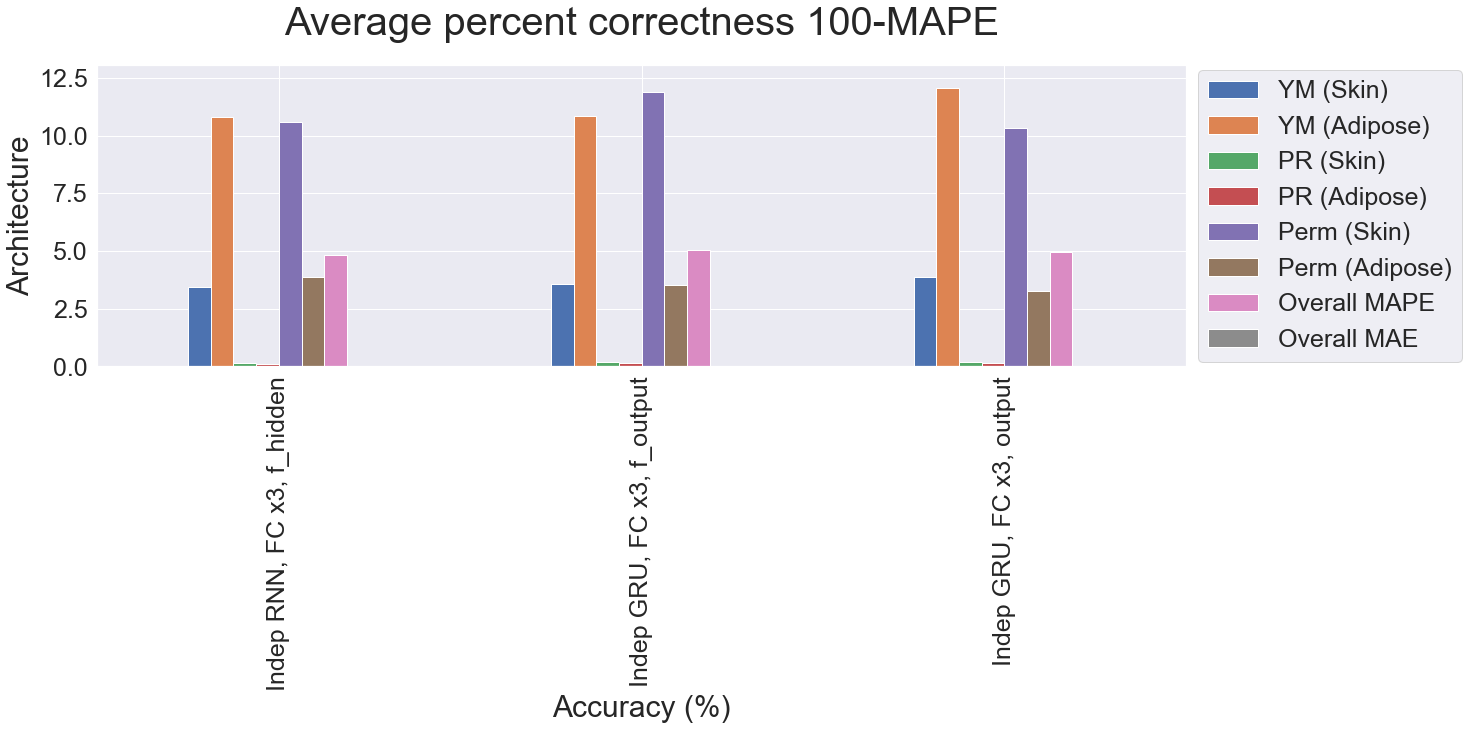

In [346]:
plot_parameter_bars(wpds, max_y=max(wpds.max())+1)

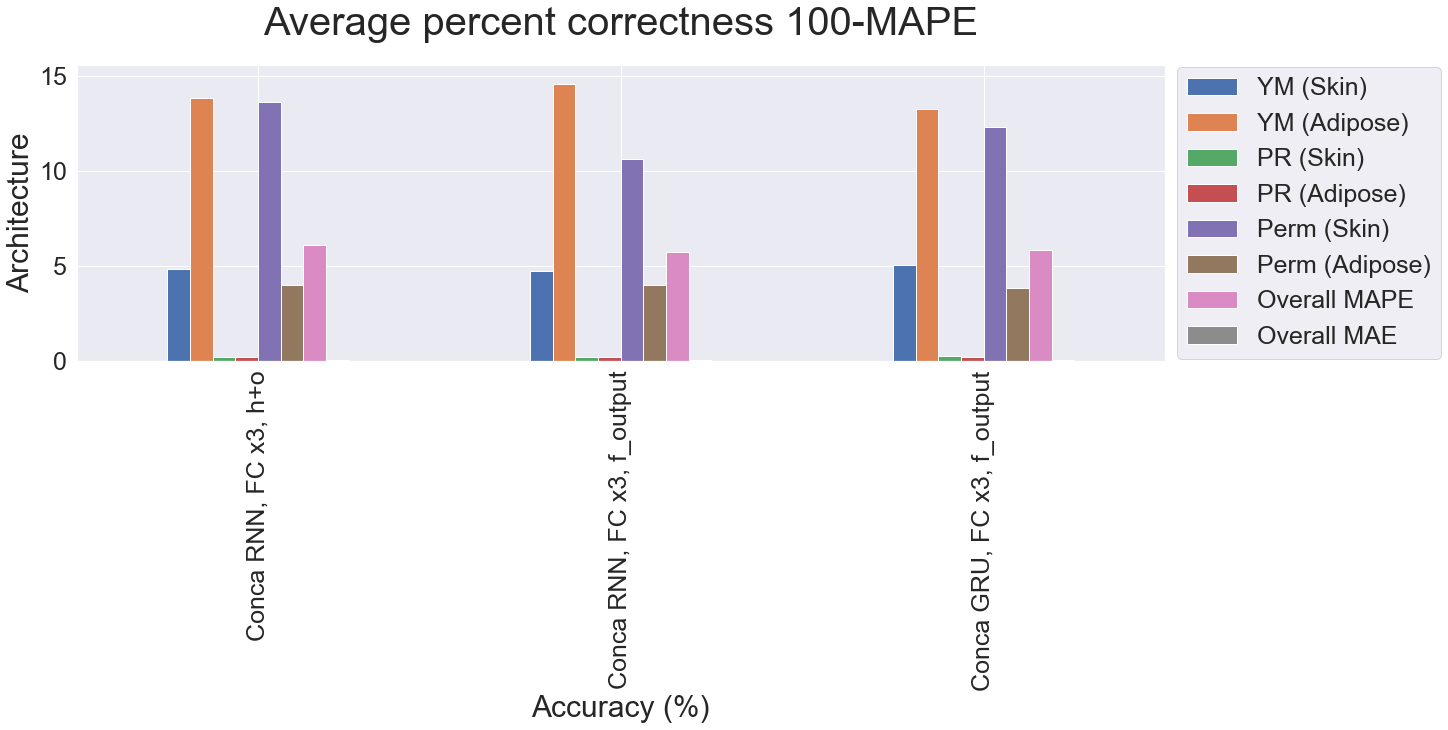

In [471]:
plot_parameter_bars(wpds, max_y=max(wpds.max())+1)

In [ ]:
wpds

### Further FCs

In [429]:
m1 = pd.read_csv("../Results/KFCV/WPD/Further_FCs_1.csv")
m2 = pd.read_csv("../Results/KFCV/WPD/Further_FCs_2.csv")
m3 = pd.read_csv("../Results/KFCV/WPD/Further_FCs_3.csv")
m4 = pd.read_csv("../Results/KFCV/WPD/Further_FCs_(1024)3.csv")

In [464]:
display(m4)
display(m3)

,Unnamed: 0,Architecture,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE
0,0,"Concatenate, GRU, multi FC, output 1024",5.025046,16.900644,0.255352,0.238815,13.052889,4.229417,6.617027,0.049263


,Unnamed: 0,Architecture,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE
0,0,"Concatenate, GRU, multi FC, output",5.025046,16.900644,0.255352,0.238815,13.052889,4.229417,6.617027,0.049263


In [430]:
m4['Architecture']='Concatenate, GRU, multi FC, output 1024'

In [455]:
wpds_fc = pd.concat([m1, m2, m3, m4])

In [456]:
wpds_fc = wpds_fc.drop(columns='Unnamed: 0')

In [457]:
def get_arches(x):
    x = x.split(', ')
    
    out = x[-1].split(' ')
    further_fc = False
    if len(out) == 2:
        further_fc = True
        x[-1] = out[0]
        
    
    x[0] = x[0][:6] if x[0] == 'Concatenate' else x[0][:5]
    x[2] = f'x{4 if x[-1] != "output" else (7 if not further_fc else 6)} FC'
    
    return ', '.join(x)

In [458]:
wpds_fc['Architecture'] =  wpds_fc['Architecture'].apply(lambda x: get_arches(x))

In [459]:
wpds_fc = wpds_fc.set_index(['Architecture'])

In [460]:
wpds_fc

,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE
Architecture,,,,,,,,
"Indep, RNN, x4 FC, f_hidden",5.228603,18.000797,0.258193,0.247503,13.694014,5.034026,7.077189,0.051026
"Concat, GRU, x4 FC, f_output",5.025046,16.900644,0.255352,0.238815,13.052889,4.229417,6.617027,0.049263
"Concat, GRU, x7 FC, output",5.025046,16.900644,0.255352,0.238815,13.052889,4.229417,6.617027,0.049263
"Concat, GRU, x6 FC, output",5.025046,16.900644,0.255352,0.238815,13.052889,4.229417,6.617027,0.049263


In [461]:
wpds_fc.to_csv("../Results/KFCV/WPD/Further_FCs_all.csv")

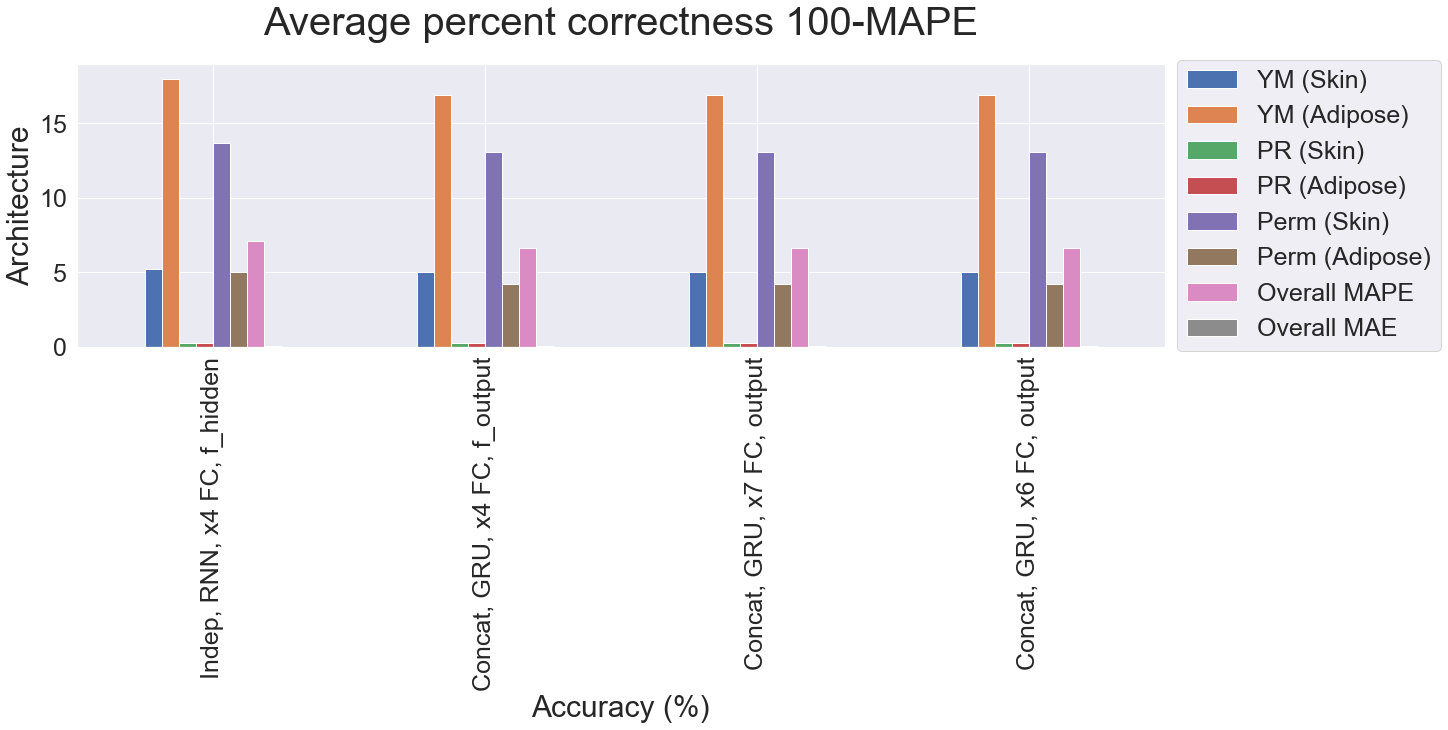

In [462]:
plot_parameter_bars(wpds_fc, max_y=max(wpds_fc.max())+1)